## DATA ANALYSIS USING VISUALIZATION IN BANKING ####

The data used for this project is Bank Marketing Data Set from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html

During the work, the task of a preliminary analysis of a positive response (term deposit) to direct calls from the bank is solved. In essence, the task is the matter of bank scoring, i.e. according to the characteristics of clients (potential clients), their behavior is predicted (loan default, a wish to open a deposit, etc.).

The aim of this project is to find the following :
* What are the most useful Python libraries for visual analysis?
* How to build interactive plots?
* How to visualize single features?
* How to do a visual analysis for the feature interaction?
* How to provide a comprehensive visual analysis for numerical and categorical features?



Libraries used : 
* Matplotlib
* Seaborn
* Plotly

#### IMPORTING DATA AND LIBRARIES

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [5]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# The target feature shows a positive behavior of a phone call during the marketing campaign.
## For easier analysis, we will be mapping positive outcome as 1 and negative outcome as 0

In [7]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
df.shape

(41188, 21)

### Analysing Age Distribution

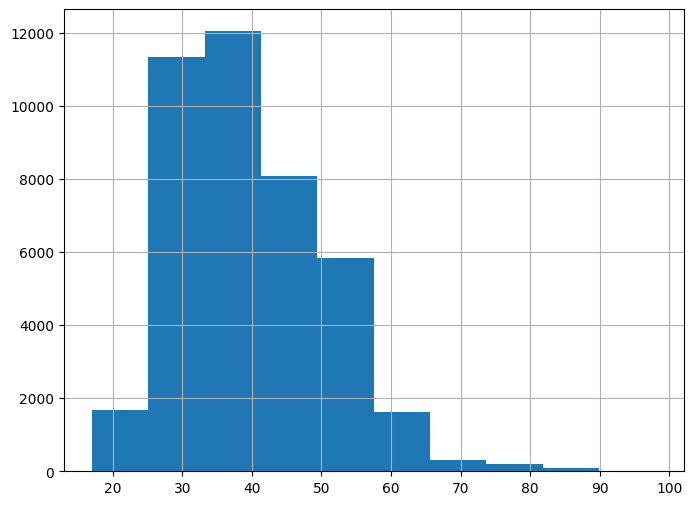

In [22]:
df["age"].hist()
plt.savefig('AgeDist')

In [12]:
# The histogram shows that most of our clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.

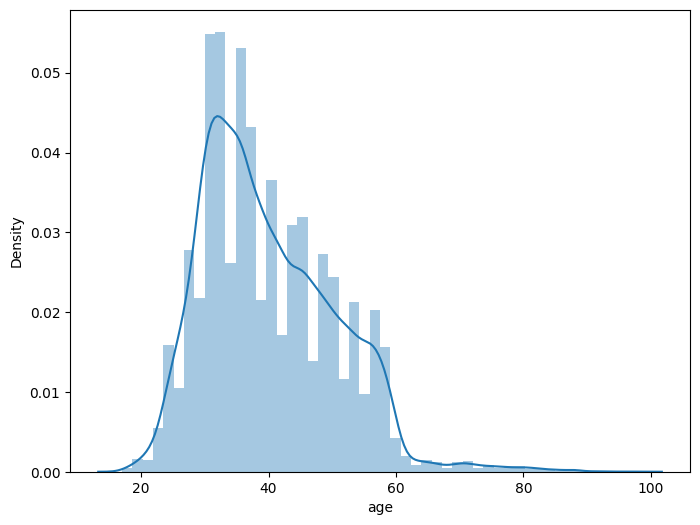

In [23]:
# Analysing the age distribution using distribution plot

sns.distplot(df.age)
plt.savefig('AgeDistPlot')

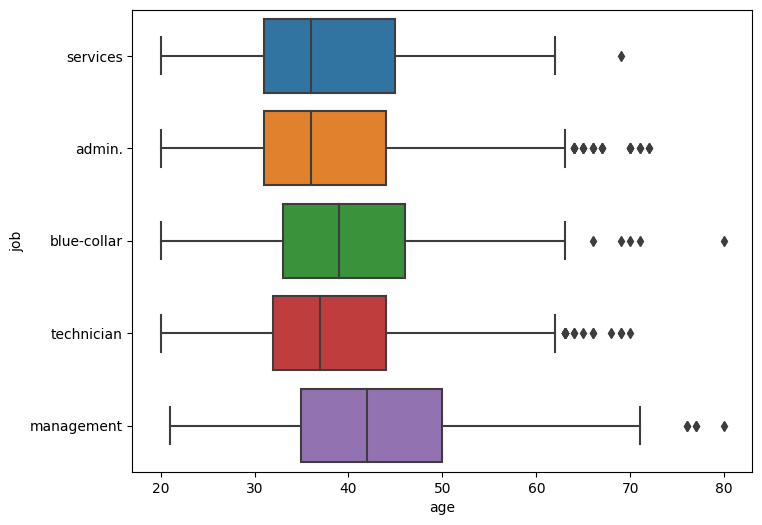

In [24]:
# COMPARING AGE OF CUSTOMERS OF TOP 5 JOBS 

top_jobs = (
    df.job.value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="job", x="age", data=df[df.job.isin(top_jobs)], orient="h"
)
plt.savefig('Boxplt')

#### The plot shows that among the top-5 client categories by the type of employment, the most senior customers represent the management, and the largest number of outliers is among the categories of admin. and technician.

In [15]:
# Identifying correlation between martial status, job with the degree of attraction by using heatmap

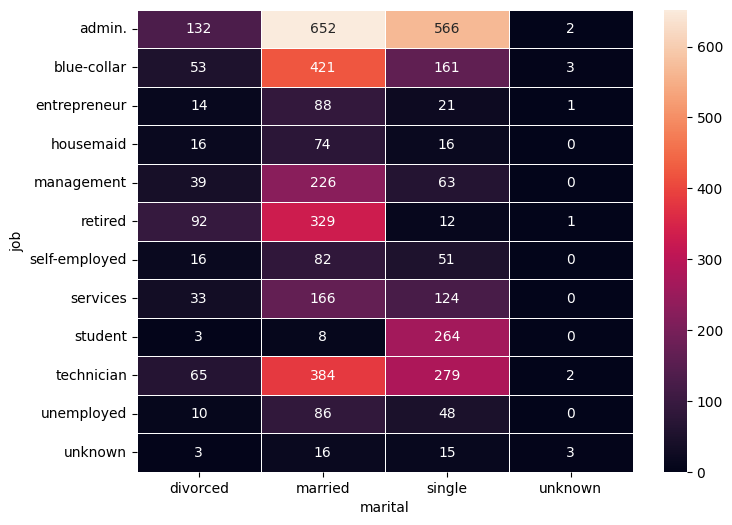

In [25]:
job_marital_y = (
    df.pivot_table(
        index="job", columns="marital", values="y", aggfunc=sum
    )
)
sns.heatmap(job_marital_y, annot=True, fmt="d", linewidths=0.5)
plt.savefig('CorrelationHeatMap')

### Building Interactive Charts with Plotly

In [17]:
age_df = (
    df.groupby("age")[["y"]]
    .sum()
    .join(df.groupby("age")[["y"]].count(), rsuffix='_count')
)
age_df.columns = ["Attracted", "Total Number"]

In [26]:
trace0 = go.Scatter(x=age_df.index, y=age_df["Attracted"], name="Attracted")
trace1 = go.Scatter(x=age_df.index, y=age_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Statistics by client age"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)
plt.savefig('InteractiveLinePlot')

<Figure size 800x600 with 0 Axes>

#### Exploring client age depending on the family status using interactive Boxplot

In [28]:
data = []

for status in df.marital.unique():
    data.append(go.Box(y=df[df.marital == status].age, name=status))
iplot(data, show_link=False)
plt.savefig('Boxplot-AgeFamilyStatus')

<Figure size 800x600 with 0 Axes>

##### Comparing the age of customers for the top 3 of the most common levels of education using a box plot.

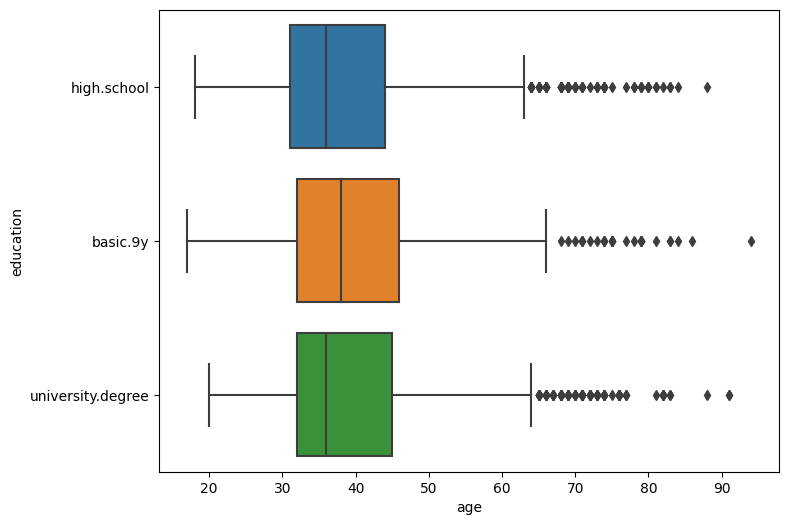

In [29]:
top_3 = (
    df.education.value_counts().sort_values(ascending=False).head(3).index.values
)
sns.boxplot(
    y="education", x="age", data=df[df.education.isin(top_3)], orient="h"
)
plt.savefig('AgeOfTop3Cust.')

###

# CONCLUSIONS AND INTERPRETATIONS 

* There are neither any data missing, nor explicit outliers that should be cut. But we can omit `housing`, `loan` and `day_of_week` features in the next steps. 
   
* The `euribor3m` and `nr.employed` features strongly correlate with `emp.var.rate`.
* Employment Variation Rate is a quarterly indicator, `euribor3m` - euribor 3 month rate is a day indicator, and `nr.employed` - number of employees is a quarterly indicator. 
* The correlation of the employment change with the number of employed issues itself is obvious, but its correlation with EURIBOR (Euro Interbank Offered Rate, the European interbank offer rate) is interesting. 
* This indicator is based on the average interbank interest rates in Eurozone. It also has a positive effect since the higher the interest rate is, the more willingly customers will spend their money on financial tools.

* Therefore, if banks want to improve their lead generation, what they should do is to improve the quality of phone conversations and run their campaigns when interest rates are high and the macroeconomic environment is stable. 
